# Bayes' Theorem
> ### _"When the facts change, I change my mind. What do you do, sir?"_
> --John Maynard Keynes

Loosely, Bayes' Theorem can be interpeted as 

$$P\left(\boldsymbol{\theta}|\textbf{d}\right)=\frac{P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left> (\boldsymbol{\theta}\right)}{P\left(\textbf{d}\right)}$$
 
in which $\boldsymbol{\theta}$ are parameters and $\mathbf{d}$ are the data.

This is really just rearranging the law of conditional probabilities:

$$P\left(\boldsymbol{\theta}|\textbf{d}\right)P\left(\textbf{d}\right)=P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left(\boldsymbol{\theta}\right)$$

_Um, what?_ Let's use pictures to make this easier to understand.

## A Venn diagram to explore conditional probabilities
<img src="intro_to_bayes_files/conditional_probability.png" style="inline: left; width: 50%; margin-right: 1%; margin-bottom: 0.5em;">


By [Gnathan87 - Own work, CC0](https://commons.wikimedia.org/w/index.php?curid=15991401)


What is the probability of $A$ if we know we are in $B_1$? The equation for this is:

$$P\left(A|B_1\right)$$

It is easy to see that it is 100% or:

$$P\left(A|B_1\right)=1.0$$

Why? Because the $B_1$ circle is entirely within the $A$ circle. Therefore, if we know we are in $B_1$, then we must also be in $A$.

As a general rule, we can state 
$$P\left(A|B_1\right)=\frac{P\left(A\cap B_1\right)}{P\left(B_1\right)}$$

or, equivalently 
$$P\left(A\cap B_1\right)=P\left(A|B_1\right)P\left(B_1\right)$$

So what about $P\left(A|B_2\right)$?

$$P\left(A|B_2\right)=\frac{P\left(A\cap B_2\right)}{P\left(B_2\right)}=\frac{0.12}{0.12+0.04}=0.75$$

### Bayes Theorem

Now we can derive Bayes' theorem because joint probabilities are symmetrical. Switching notation to 
$\boldsymbol{\theta} \text{ and }\mathbf{d}$:

$$P\left(\boldsymbol{\theta}\cap \mathbf{d}\right)=P\left(\mathbf{d}\cap \boldsymbol{\theta}\right)$$

$$P\left(\boldsymbol{\theta}|\textbf{d}\right) P\left(\textbf{d}\right) = P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left(\boldsymbol{\theta}\right)$$

With the tiniest little algebra, we get Bayes' theorem -- #boom#!

$$P\left(\boldsymbol{\theta}|\textbf{d}\right) = \frac{P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left(\boldsymbol{\theta}\right)}{P\left(\textbf{d}\right)}$$


# So, what does this really mean?  

## A practical example

Let's play with a concrete example, one hinging on life, death, trust, and promises kept!

<img src="intro_to_bayes_files/plant.JPG" style="inline: left; width: 28%; margin-right: 1%; margin-bottom: 0em;">
<img src="intro_to_bayes_files/dead_plant.JPG" style="inline: left; width: 30%; margin-right: 1%; margin-bottom: 0em;">



You have a plant at home, and you're going to go away for a week. If it gets watered, its probability of dying is 15%. If it doesn't get watered, it is 80% likely to die. You ask your partner to water it for you and you are 90% certain they will do it.

We can express this all in terms of probabilities and conditional probabilities.

### First a couple definitions:

$\theta_w$: partner waters the plant

$\theta_{nw}$: partner forgets to water the plant

$d_a$: plant is alive when we return 

$d_d$: plant is dead when we return

$\mathbf{d} = [d_a,d_d]$: a vector of all possible outcomes
 
$\boldsymbol{\theta} = [\theta_w,\theta_{nw}]$: a vector of all possible outcomes

Cool, so let's express what we know in probability equations:

$$P\left(d_d | \theta_w\right)=0.15$$
$$P\left(d_d | \theta_{nw}\right)=0.8$$
$$P\left(\theta_w\right)=0.9$$
$$P\left(\theta_{nw}\right)=0.1$$



And we can assign these as python variables to get our maths groove on:

In [ ]:
PDd_thw = 0.15
PDd_thnw = 0.8
Prior_thw = 0.9
Prior_thnw = 0.1


Now we can ask questions like, "what is the probability the plant is dead?"

To calculate, we add up all the conditional probablities like this:

$$P\left(d_d\right) = P\left(d_d\cap\theta_w\right) + P\left(d_d\cap\theta_{nw}\right)$$

$$P\left(d_d\right) = P\left(d_d|\theta_w\right)P\left(\theta_w\right) + P\left(d_d|\theta_{nw}\right)P\left(\theta_{nw}\right)$$

In [ ]:
PDd = PDd_thw*Prior_thw + PDd_thnw*Prior_thnw
print ('Probability Plant is dead = {0:.3f}'.format(PDd))


Since we only have two discrete outcomes, the probability of the plant being alive is simply 

$$P\left(d_a\right)=1-P\left(d_d\right)$$


In [ ]:
PDa = 1-PDd
print ('Probability Plant is alive = {0:.3f}'.format(PDa))

Great! So we can incorporate all the possible arrangements of events to determine likely outcomes. But....what we are _really_ interested in is what we learn with partial information. This is where household harmony can be made or broken!

## Learning from information

We come home and see that the plant is dead (crumbs!). Who to blame? What is the probability that our partner forgot to water it? 

Mathematically, this is;
$$P\left(\theta_{nw} | d_d\right)$$

We can use Bayes' theorem to evaluate this new information (e.g. we have observed that the plant is dead)

$$P\left(\theta_{nw} | d_d\right) = \frac{P\left(d_d | \theta_{nw}\right) P\left(\theta_{nw}\right)}{P\left(d_d\right)}$$

In [ ]:
PthnwDd = PDd_thnw * Prior_thnw/ PDd
print ("Probability that partner failed to water the plant")
print("having seen it's dead is {0:.3f}".format(PthnwDd))

Alternatively, we can see the converse: How likely did our partner water the plant given that it's alive?

$$P\left(\theta_w | d_a\right) = \frac{P\left(d_a | \theta_w\right) P\left(\theta_w\right)}{P\left(d_a\right)}$$

In [ ]:
PthwDa = (1-PDd_thw) * Prior_thw/ PDa
print ("Probability that partner did water the plant")
print ("having seen it's alive is {0:.3f}".format(PthwDa))

How likely did our partner forget, given that we see it's alive?

$$P\left(\theta_{nw} | d_a\right) = \frac{P\left(d_a | \theta_{nw}\right) P\left(\theta_{nw}\right)}{P\left(d_a\right)}$$

In [ ]:
PthnwDa = (1-PDd_thnw) * Prior_thnw/ PDa
print ("Probability that partner forgot to water the plant")
print("having seen it's alive is {0:.3f}".format(PthnwDa))

### Continuous variables

Right then, but we are in the world of continuous variables, not simple discrete probabilities

This means that we end up with probability density functions rather than discrete probabilities and the denominator on the RHS gets tricky to evaluate (the total probability). Luckily, we are mostly conncerned with finding the parameters that maximize the probability and less concerned with the probability itself.

<img src="intro_to_bayes_files/Fig10.3_Bayes_figure.png" style="inline: left; width: 75%; margin-right: 1%; margin-bottom: 0.5em;">


This is a learning framework, where what we know at the end is a function of what we started with and what we _learned_ through a new experiment (model) or new information

$$\underbrace{P(\boldsymbol{\theta}|\textbf{d})}_{\substack{\text{posterior} \\ \text{pdf}}} \propto \underbrace{\mathcal{L}( \boldsymbol{\theta}| \textbf{d})}_{\substack{\text{likelihood} \\ \text{function}}} \underbrace{P(\boldsymbol{\theta})}_{\substack{\text{prior } \\ \text{pdf}}} $$


$$\underbrace{P(\boldsymbol{\theta}|\textbf{d})}_{\substack{\text{what we} \\ \text{know now}}} \propto \underbrace{\mathcal{L}(\boldsymbol{\theta} | \textbf{d})}_{\substack{\text{what we} \\ \text{learned}}} \underbrace{P(\boldsymbol{\theta})}_{\substack{\text{what we} \\ \text{knew}}} $$


## Let's look at an interactive example of how distributions behave

In [1]:
import bayes_helper as bh
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/Users/mnfienen/Documents/GIT/GMDSI_notebooks/dependencies/pyemu/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


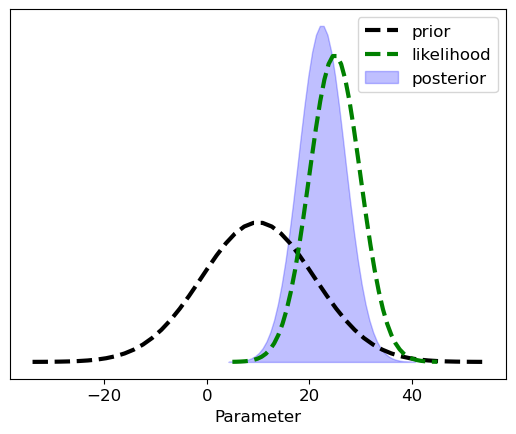

In [2]:
bh.plot_posterior(prior_mean=10, prior_std=11, likeli_mean = 25, likeli_std=5);

In [3]:
interact(bh.plot_posterior,
         prior_mean=(1, 20., .5), likeli_mean=(1, 20, 1), 
         prior_std=(.1, 8, .1), likeli_std=(.1, 8, 2));

interactive(children=(FloatSlider(value=10.5, description='prior_mean', max=20.0, min=1.0, step=0.5), FloatSli…

# The mandatory "coin-flipping example" 
> _Borrowed from **Bayesian Methods for Hackers**. The full Github repository is available [here](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)_

We can start with an "ignorance" prior - equal probabilities of all outcomes (both, in the case---heads and tails). By flipping a coin we can observe outcomes, constantly updating and learning from each experiment.

In [ ]:
max_trials = 1000
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. 
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,9))

import scipy.stats as stats
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, max_trials]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials) / 2), 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)
plt.tight_layout();

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line). 

Notice that the plots are not always *peaked* at 0.5. There is no reason it should be: recall we assumed we did not have a prior opinion of what $p$ is. In fact, if we observe quite extreme data, say 8 flips and only 1 observed heads, our distribution would look very biased *away* from lumping around 0.5 (with no prior opinion, how confident would you feel betting on a fair coin after observing 8 tails and 1 head). As more data accumulate, we would see more and more probability being assigned at $p=0.5$, though never all of it.
